In [1]:
import jieba
from jieba import lcut, analyse, Tokenizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
def Keyword_Finder(keywords):
    for item in keywords:
        print(item[0], item[1])
def Openfile(path):
    f = open(path, "r", encoding="utf-8")
    result = f.read()
    f.close()
    return result
def Openfile_sp(path):
    f = open(path, "r", encoding="utf-8")
    result = f.readlines()
    f.close()
    return result

In [3]:
# open file
stopwords_file = 'datafile/stop_words.txt'
jieba.set_dictionary('./dict.txt.big.txt')
jieba.load_userdict('datafile/user_dict.txt')
jieba.analyse.set_stop_words('datafile/stop_words.txt')
tigerair_file = 'datafile/tigerair_rawtext.txt'
evaair_file = 'datafile/EvaAir_text.txt'

tigerair_text = Openfile(tigerair_file)
evaair_text = Openfile(evaair_file)

Building prefix dict from D:\WORK5\TechProject\TechProject2019\dict.txt.big.txt ...
Loading model from cache C:\Users\ASUS\AppData\Local\Temp\jieba.u15c153cb84f92c395787873e58f7016c.cache
Loading model cost 0.955 seconds.
Prefix dict has been built succesfully.


In [4]:
# cut text
r = lcut(tigerair_text, cut_all=False, HMM=False)
tigerair_keywords = analyse.extract_tags(tigerair_text, topK=150, withWeight=True)
r1 = lcut(evaair_text, cut_all=False, HMM=False)
evaair_keywords = analyse.extract_tags(evaair_text, topK=150, withWeight=True)
cut1 = jieba.cut(tigerair_text, cut_all=True, HMM=False)
cut1_sp = " ".join(cut1)
cut2 = jieba.cut(evaair_text, cut_all=True, HMM=False)
cut2_sp = " ".join(cut2)

In [5]:
df1 = pd.DataFrame(tigerair_keywords)
df2 = pd.DataFrame(evaair_keywords)

In [6]:
df1.to_csv('datafile/tigerair_keywords.csv')
df2.to_csv('datafile/evaair_keywords.csv')

In [7]:
#cut to cloud
dec = Openfile_sp(stopwords_file)
stopwords = set(STOPWORDS)
for i in range(len(dec)):
    stopwords.add(dec[i].strip())

In [8]:
tigerair_cloud = WordCloud(
    font_path="msj.ttf", #設置字體
    background_color="white", #背景顏色
    stopwords=stopwords,
    max_words=100)
evaair_cloud = WordCloud(
    font_path="msj.ttf", #設置字體
    background_color="white", #背景顏色
    stopwords=stopwords,
    max_words=100)

In [9]:
tigerair_cloud.generate(cut1_sp)
evaair_cloud.generate(cut2_sp)

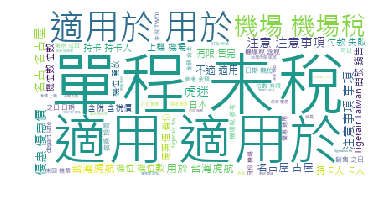

<Figure size 1600x1200 with 0 Axes>

In [11]:
plt.imshow(tigerair_cloud)
plt.axis("off")
plt.figure(figsize=(4,3), dpi=400)
plt.savefig('image/test.png')
plt.show()

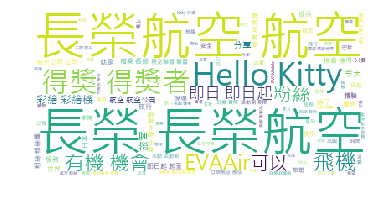

<Figure size 4000x2400 with 0 Axes>

In [12]:
plt.imshow(evaair_cloud)
plt.axis("off")
plt.figure(figsize=(10,6), dpi=400)
plt.savefig('image/test.png')
plt.show()